In [1]:
# 오늘 날씨 가져와서 그래프 그리기
import bs4
import requests

# 필요한 html 가져오기
resp = requests.get(
    "https://www.weather.go.kr/weather/observation/currentweather.jsp")
text = resp.text
print(text)

=m&amp;stn=232" >천안</a></td>
		<td>&nbsp;</td>
		
		<td>20 이상</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>14.3</td>
		<td>-7.7</td>
		<td>13.6</td>
		<td>&nbsp;</td>
		
			<td>&nbsp;</td>
		
		<td>21</td>
		<td>서</td>
		<td><script>writeWindSpeed('3.2', false, '', '', 1);</script></td>
		<td>1019.2</td>
	</tr>
         
	<tr>
		<td><a href="/weather/observation/currentweather.jsp?tm=2020.3.12.17:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=95" >철원</a></td>
		<td>&nbsp;</td>
		
		<td>20 이상</td>
		<td>&nbsp;</td>
		<td>&nbsp;</td>
		<td>10.5</td>
		<td>-6.8</td>
		<td>8.8</td>
		<td>&nbsp;</td>
		
			<td>&nbsp;</td>
		
		<td>29</td>
		<td>남서</td>
		<td><script>writeWindSpeed('3.6', false, '', '', 1);</script></td>
		<td>1018.6</td>
	</tr>
         
	<tr>
		<td><a href="/weather/observation/currentweather.jsp?tm=2020.3.12.17:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=276" >청송군</a></td>
		<td>&nbsp;</td>
		
		<td>20 이상</td>
		<td>&nbsp;</td>
		<td>&nb

In [2]:
bs = bs4.BeautifulSoup(text, 'html.parser')
# class 속성의 값이 table_develop3 인 데이터 찾아오기
table = bs.select('.table_develop3')  # select로 찾아오면 list이다.
print(table)

020.3.12.17:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=108">서울</a></td>
<td>맑음</td>
<td>19.9</td>
<td>0</td>
<td>0</td>
<td>11.7</td>
<td>-8.7</td>
<td>9.9</td>
<td> </td>
<td> </td>
<td>23</td>
<td>서남서</td>
<td><script>writeWindSpeed('4.5', false, '', '', 1);</script></td>
<td>1018.7</td>
</tr>
<tr>
<td><a href="/weather/observation/currentweather.jsp?tm=2020.3.12.17:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=188">성산</a></td>
<td> </td>
<td>19.4</td>
<td> </td>
<td> </td>
<td>12.9</td>
<td>2.9</td>
<td>12.3</td>
<td> </td>
<td> </td>
<td>51</td>
<td>서</td>
<td><script>writeWindSpeed('2.4', false, '', '', 1);</script></td>
<td>1021.8</td>
</tr>
<tr>
<td><a href="/weather/observation/currentweather.jsp?tm=2020.3.12.17:00&amp;type=t99&amp;mode=0&amp;reg=100&amp;auto_man=m&amp;stn=90">속초</a></td>
<td> </td>
<td>13.1</td>
<td> </td>
<td> </td>
<td>14.5</td>
<td>-3.3</td>
<td>13.7</td>
<td> </td>
<td> </td>
<td>29</td>
<td>서남서</td>
<td><script>writeWind

In [3]:
# 도시 이름, 온도, 습도를 저장할 list를 생성
loc = []
temp = []
hum = []

# 가져온 테이블 중에서 첫번째 테이블로부터 줄(tr) 단위로 읽기
for tr in table[0].find_all('tr'):
    tds = tr.find_all('td')  # tr태그에서 td를 전부 찾아서 tds에 대입
    for td in tds:
        if td.find('a'):  # a 태그가 있으면 도시이름이 있는 행
            # 도시 이름을 loc 추가
            loc.append(td.find('a').text)
            # 온도를 temp에 추가 (페이지에서 몇번째에 있는지 확인)
            temp.append(tds[5].text)
            # 습도를 temp에 추가 (페이지에서 몇번째에 있는지 확인)
            hum.append(tds[10].text)

In [4]:
# 데이터 확인
# 인덱싱은 번호 1개만 작성해서 하나의 데이터만 추출
print(loc[0:5])  # 0~4 번행 까지 확인 - 슬라이싱(범위를 가지고 추출)
print(temp[0:5])
print(hum[0:5])

['강릉', '강진군', '강화', '거제', '거창']
['15.9', '12.2', '7.8', '11.8', '15.1']
['26', '44', '65', '47', '16']


In [5]:
#필요한 도시의 데이터만 추출
cities = ['서울', '부산', '인천', '대구', '대전', '전주', '광주', '제주도']
#위 도시들의 온도와 습도를 저장할 list
temperatures = []
humidities = []

#cities 에 있는 데이터만 추출해서 저장
for city in cities:
    j = 0
    for c in loc:
        if c == city:
            temperatures.append(temp[j])
            humidities.append(hum[j])
            break
        j = j+1

print(cities)
print(temperatures)
print(humidities)

['서울', '부산', '인천', '대구', '대전', '전주', '광주', '제주도']
['11.7', '12.3', '9.5', '16.6', '15.1', '12.8', '15.6']
['23', '40', '42', '26', '22', '38', '21']


In [6]:
# 파이썬에서 시각화를 하는 기본 패키지
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위한 패키지 
from matplotlib import font_manager,rc,rcParams 
import platform # 운영체제 확인을 위한 패키지 

#주피터 노트북에서 그래프를 셀 안에 출력해주는 설정 
# %matplotlib inline # 주피터 노트북에서 그래프가 클래스이름으로 출력 - 한번더 실행해도 됨 

# 음수를 제대로 표현하기 위한 설정 
rcParams['axes.unicode_minus'] = False # 이 설정을 하지 않으면 음수가 네모로 출력 

# 한글 폰트 설정
if platform.system() == 'Windows' : # 윈도우
    font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name
    rc('font', family=font_name)
elif platform.system() == 'Darwin': # 맥 
    rc('font', family='AppleGothic')
else : 
    print("알수없는 운영체제")

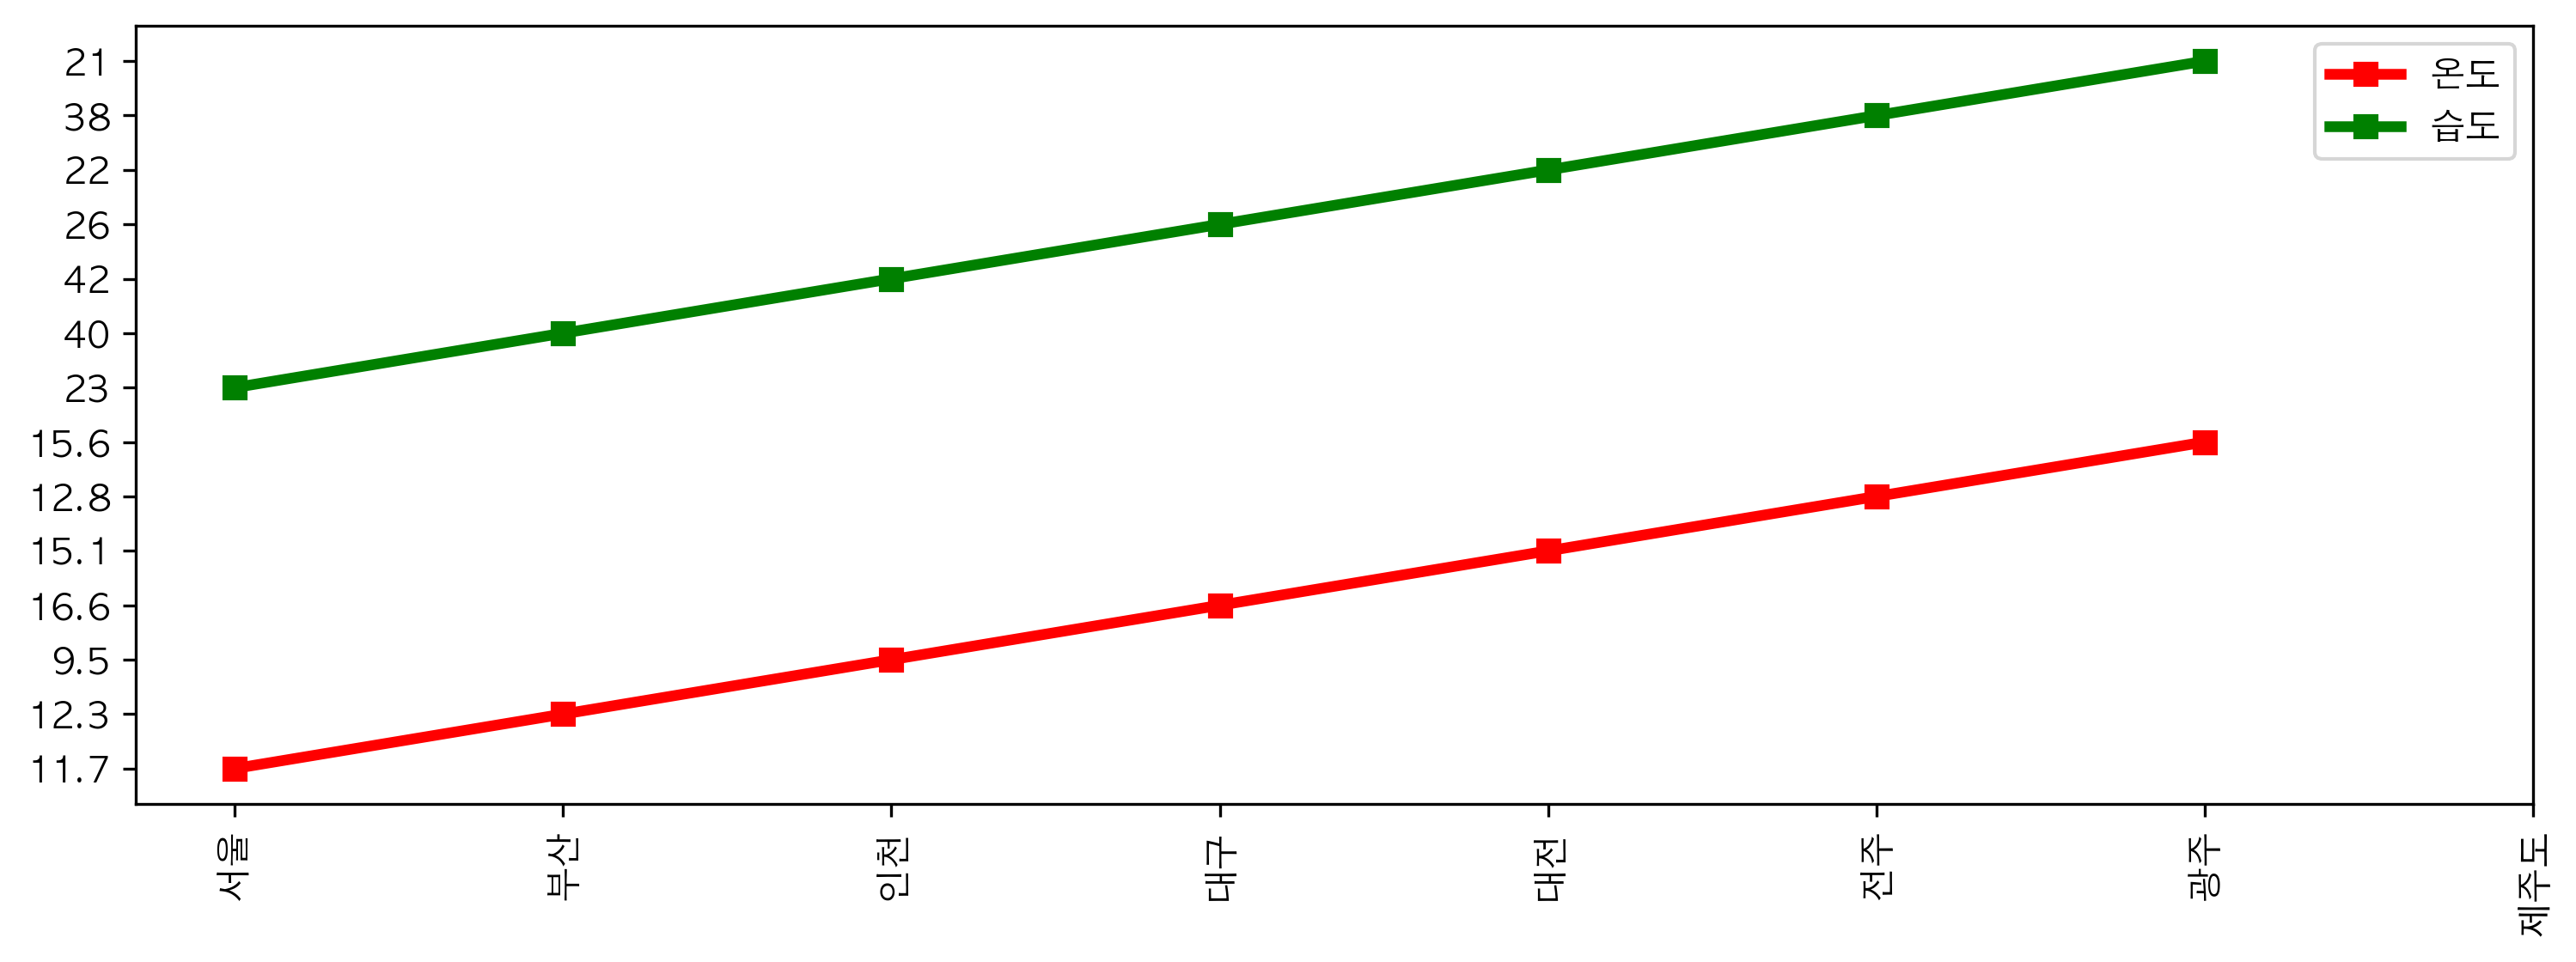

In [7]:
# 그래프 그리기
plt.figure(figsize=(12,4), dpi=300) #그래프 크기 설정 - 가로 12inch 세로 4inch
#꺽은선 그래프 - plot
plt.plot(temperatures, label='온도', lw=3, color='r', linestyle='-', marker='s')
plt.plot(humidities, label='습도', lw=3, color='g', linestyle='-', marker='s')

# x 축 
plt.xticks(range(0, len(cities), 1), cities, rotation='vertical')
# 범례 
plt.legend()
# 그림으로 저장 (보고서만들때만)
plt.savefig('gragh.png', dpi=300)
# 출력 
plt.show()